In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
shapefile = gpd.read_file("C:\Repos\FINE\examples\Multi-regional_Energy_System_Workflow\InputData\SpatialData\ShapeFiles\clusteredRegions.shp")

In [4]:
shapefile.head()

,index,geometry
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236..."
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996..."
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067..."
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024..."
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048..."


In [12]:
len(shapefile)

8

In [46]:
shapefile['value1'] = np.random.randint(200, size=8)
shapefile['value2'] = np.random.randint(100, size=8)

In [47]:
shapefile['sum'] = shapefile['value1'] + shapefile['value2']

In [48]:
shapefile.head()

,index,geometry,value1,value2,sum,total_degree,value1_degree,value2_degree
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236...",87,55,142,360,227.200000,132.800000
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996...",168,12,180,360,230.679612,129.320388
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067...",183,91,274,360,77.142857,282.857143
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024...",91,64,155,360,192.918660,167.081340
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048...",194,97,291,360,224.615385,135.384615


In [49]:
shapefile['total_degree'] = 360
shapefile['value1_degree'] = (shapefile['value1'] / shapefile['sum']) * shapefile['total_degree']
shapefile['value2_degree'] = (shapefile['value2'] / shapefile['sum']) * shapefile['total_degree']

In [50]:
shapefile.head()

,index,geometry,value1,value2,sum,total_degree,value1_degree,value2_degree
0,cluster_0,"MULTIPOLYGON (((4223496.092 2734368.143, 42236...",87,55,142,360,220.563380,139.436620
1,cluster_1,"MULTIPOLYGON (((4199685.633 3404002.686, 41996...",168,12,180,360,336.000000,24.000000
2,cluster_2,"MULTIPOLYGON (((4106781.295 3394915.767, 41067...",183,91,274,360,240.437956,119.562044
3,cluster_3,"MULTIPOLYGON (((4602449.935 3408647.034, 46024...",91,64,155,360,211.354839,148.645161
4,cluster_4,"POLYGON ((4553700.750 2730225.831, 4553786.048...",194,97,291,360,240.000000,120.000000


In [51]:
centroid = shapefile.copy()
centroid['geometry'] = centroid.geometry.centroid

In [52]:
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection

In [60]:
import FINE as fn

(<Figure size 432x432 with 1 Axes>, <AxesSubplot:>)

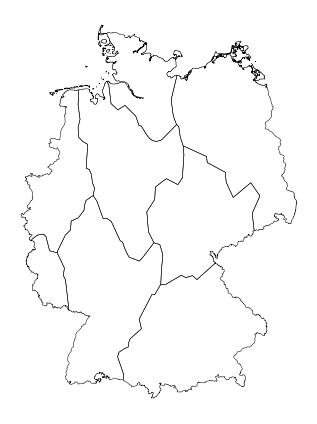

In [61]:
locFilePath = r"C:\Repos\FINE\examples\Multi-regional_Energy_System_Workflow\InputData\SpatialData\ShapeFiles\clusteredRegions.shp"
fn.plotLocations(locFilePath, indexColumn='index')

(3999254.586507462, 4704583.497893981, 2640765.16909005, 3594602.1733842236)

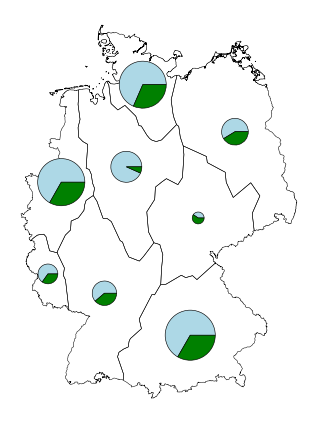

In [63]:
fig, ax = fn.plotLocations(locFilePath, indexColumn='index') #plt.subplots(figsize=(12,8))
ax.set_aspect('equal')
#regions = shapefile.plot(ax=ax, zorder=1, color='None', linewidth=0.5, alpha=0.5, edgecolor='black')
#centroid.plot(ax=regions, color='black', marker='^', markersize=5)

for index in centroid.index:
    xValue = centroid.geometry[index].x
    yValue = centroid.geometry[index].y
    
    pie1 = Wedge((xValue, yValue), 
                 shapefile.loc[index, 'sum']*200, # radius
                 0, # theta1
                 shapefile.loc[index,'value1_degree'], #theta2
                 fc='lightblue', lw=0.6, zorder=2, edgecolor='black')
    
    pie2 = Wedge((xValue, yValue), 
                 shapefile.loc[index, 'sum']*200, 
                 shapefile.loc[index,'value1_degree'], 
                 shapefile.loc[index,'value1_degree']+shapefile.loc[index,'value2_degree'], 
                 fc='green', lw=0.6, zorder=2, edgecolor='black')
    
    ax.add_artist(pie1)
    ax.add_artist(pie2)
    
regions.axis('off')